In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=200, fit_intercept=True):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
    
    def add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def cost(self, h, y):
        # return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
        return (-y * np.log(h + 1e-9) - (1 - y) * np.log(1 - h + 1e-9))

    def fit(self, X, y):
        if self.fit_intercept:
            X = self.add_intercept(X)
        
        # self.weights = np.zeros(X.shape[1])
        self.weights = np.random.randn(X.shape[1])
        for i in range(self.num_iter):
            z = np.dot(X, self.weights)
            #
            h = self.sigmoid(z)
            gradient = np.dot(X.T, (h - y)) 
            self.weights -= self.lr * gradient
            
            if i % 100 == 0:
                z = np.dot(X, self.weights)
                h = self.sigmoid(z)
#                 print(f'loss: {self.cost(h, y)} \t')
                print(f'weights: {self.weights} \t')
        
        print('LogisticRegression Model(learning_rate={},num_iter={})'.format(self.lr, self.num_iter))
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.add_intercept(X)
    
        return self.sigmoid(np.dot(X, self.weights))
    
    def predict(self, X, threshold=0.5):
        return self.predict_prob(X) >= threshold
    
    def accuracy_score(self, y, y_pred):
        accuracy = np.mean(y_pred == y)
        return accuracy
    
    def score(self, X, y):
        y_pred = self.predict(X)
        accuracy = self.accuracy_score(y, y_pred)
        return accuracy

weights: [-0.57961417  1.06761695  0.16760367] 	
weights: [-5.21253154  1.15562361  1.09642658] 	
LogisticRegression Model(learning_rate=0.01,num_iter=200)
score:1.0 	


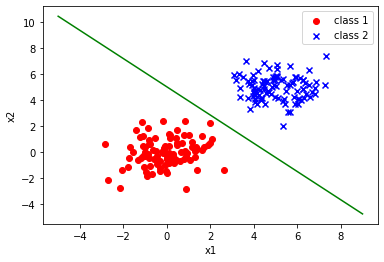

In [3]:
# 数据
mean1 = [0, 0]
cov1 = [[1, 0], [0, 1]]
mean2 = [5, 5]
cov2 = [[1, 0], [0, 1]]
size = 100
x1 = np.random.multivariate_normal(mean1, cov1, size)
x2 = np.random.multivariate_normal(mean2, cov2, size)

X = np.concatenate((x1, x2), axis=0)
# print(f'x.shape:{X.shape}')
y = np.concatenate((np.zeros(size), np.ones(size)))
# print(f'y.shape:{y.shape}')
# plot data
plt.scatter(x1[:,0], x1[:,1], color='red', marker='o', label='class 1')
plt.scatter(x2[:,0], x2[:,1], color='blue', marker='x', label='class 2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='best')
# 训练模型
clf = LogisticRegression()
clf.fit(X, y)

# 计算正确率
score = clf.score(X, y)
print(f'score:{score} \t')

# 画出决策边界
w = clf.weights
x1 = np.linspace(-5, 9, 2)
x2 = -(w[0] + w[1] * x1) / w[2]
plt.plot(x1, x2, 'g')
plt.show()

In [4]:
# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split
# # from sklearn.metrics import accuracy_score

# # iris数据集
# iris = load_iris()
# X = iris["data"]
# y = iris["target"]

# # 将数据集分为训练集和测试集
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# print(f'X_train.shape:{X_train.shape}')
# # 训练模型
# clfs = LogisticRegression(lr=0.01, num_iter=1)
# clfs.fit(X_train, y_train)
# print(f'X_train.shape:{X_train.shape}')
# # 预测测试集
# y_pred = clfs.predict(X_test)
# # 计算正确率
# accuracy = clfs.score(X_test, y_test)
# print("Accuracy:", accuracy)

# print(X_train[0])
# print(y_train[0])

In [6]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# iris数据集
iris = load_iris()
X = iris.data
y = iris.target

# 数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 训练模型
clfss = LogisticRegression()
clfss.fit(X_train, y_train)

# 预测测试集
y_pred = clfss.predict(X_test)

# 计算正确率
accuracy = clfss.score(X_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0
